## Data Mining Coursework

Fathi Hassan,          MSc Applied AI,          Candidate number: 514152,          119036334@aston.ac.uk

# Introduction

This research aims to present a data mining technique for predicting biological features from publicly available proteome data. This collection comprises parsing sequences from the internet databases IEDB (https://www.iedb.org/) and GenBank (https://www.ncbi.nlm.nih.gov/genbank/). These observations are utilised to create a classification model that accurately predicts the class of fresh data that has never been seen before.

Two datasets were provided to accomplish this. The holdout dataset was used to test the model after the other data set was utilised for training. Negative epitopes made up 69.67% of the 4907 data records in the training data set, leaving 1489 positive records. Furthermore, data analysis revealed that 451 numerical features had at least 22 significantly associated features (over 90% ). To address these characteristics, among others, the data must be pre-processed. Throughout the report, the stages of exploration, pre-processing, modelling, and the evaluation/selection of the models will be detailed and explained.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Data Exploration

In data exploration, users examine a large data set in an unstructured manner to identify initial patterns, traits, and points of interest, which is the first step in data analysis. This procedure isn't meant to unearth every nugget of information in a data set but rather to aid in the creation of a broad picture of important trends and major points that can be investigated further. Both manual and automatic tools, such as data visualisations, charts, and preliminary reports, can be used in data exploration.

Exploratory analysis of the data set revealed the following characteristics: * There are 4907 labelled records in the data set
* There are 445 features in the dataset that can be used for prediction, and these features are all type float.
* Five columns carry information that is not useful for prediction as per the assignment brief. Four of these columns are object types that carry letters and numbers as string values.
* The information columns are: Info_PepID, Info_protein_id, Info_center_pos, Info_AA, and Info_window_seq.
* The "Class" column, which is made up of integers (-1 and 1), indicates whether a particular record is a positive epitope or not.
* Further data exploration has highlighted that the data set is imbalanced, with 3418 (69.7%) records out of the total are labelled 'negative' while only 1489 (30.3%) records are labelled as 'positive'.







In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing the credit card data set using panda
DataFrame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/CW_data.csv')

#returning the head of the data set
DataFrame.head()

,Info_PepID,Info_protein_id,Info_center_pos,Info_AA,Info_window_seq,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,...,feat_CT642,feat_CT643,feat_CT644,feat_CT645,feat_CT646,feat_CT650,feat_CT651,feat_CT652,feat_CT653,feat_CT654,feat_CT655,feat_CT656,feat_CT660,feat_CT661,feat_CT662,feat_CT663,feat_CT664,feat_CT665,feat_CT666,feat_Perc_A,feat_Perc_C,feat_Perc_D,feat_Perc_E,feat_Perc_F,feat_Perc_G,feat_Perc_H,feat_Perc_I,feat_Perc_K,feat_Perc_L,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y,Class
0,AAA99570.1:2,AAA99570.1,17,D,NQTTVKADSDNNRSA,3.056565,62,133,23,42,0,1872.85,0.400000,0.800000,0.200000,0.0,0.200000,0.800000,0.266667,0.133333,0.133333,0.356000,-0.528667,0.135333,0.151333,-0.395333,0.035333,0.658667,-0.156000,-0.131333,-0.344667,-0.083333,0.096000,-0.332000,1.922667,-0.211333,-0.048667,-0.870667,0.683333,-0.739400,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.200000,0.0,0.066667,0.066667,0.133333,0.133333,0.066667,0.0,0.0,1
1,AAA99570.1:2,AAA99570.1,18,S,QTTVKADSDNNRSAS,3.056565,61,132,22,42,0,1845.82,0.466667,0.800000,0.200000,0.0,0.200000,0.800000,0.266667,0.133333,0.133333,0.328667,-0.545333,0.172000,0.129333,-0.462667,0.054000,0.632667,-0.182000,-0.184667,-0.464667,-0.242000,-0.042000,-0.232000,1.878667,-0.390667,-0.041333,-0.886667,0.620667,-0.705133,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.133333,0.0,0.066667,0.066667,0.200000,0.133333,0.066667,0.0,0.0,1
2,AAA99570.1:2,AAA99570.1,19,D,TTVKADSDNNRSASV,2.923231,61,133,21,41,0,1816.82,0.466667,0.866667,0.266667,0.0,0.266667,0.733333,0.266667,0.133333,0.133333,0.210000,-0.554000,0.188000,0.111333,-0.526000,0.185333,0.532667,-0.222000,-0.278000,-0.592000,-0.190667,-0.070667,-0.033333,1.589333,-0.600000,-0.048000,-0.854000,0.575333,-0.735267,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.0,0.133333,0.0,0.000000,0.066667,0.200000,0.133333,0.133333,0.0,0.0,1
3,AAA99570.1:2,AAA99570.1,20,N,TVKADSDNNRSASVK,2.923231,63,138,22,40,0,1843.89,0.400000,0.800000,0.266667,0.0,0.266667,0.733333,0.333333,0.200000,0.133333,0.223333,-0.504667,0.230000,0.071333,-0.424667,0.089333,0.604000,-0.112667,-0.400000,-0.531333,-0.119333,-0.065333,-0.006000,1.692000,-0.395333,-0.139333,-0.657333,0.622667,-0.825600,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.0,0.133333,0.0,0.000000,0.066667,0.200000,0.066667,0.133333,0.0,0.0,1
4,AAA99570.1:2,AAA99570.1,21,N,VKADSDNNRSASVKK,2.739572,65,143,23,39,0,1870.96,0.333333,0.733333,0.266667,0.0,0.266667,0.733333,0.400000,0.266667,0.133333,0.236667,-0.455333,0.272000,0.031333,-0.323333,-0.006667,0.675333,-0.003333,-0.522000,-0.470667,-0.048000,-0.060000,0.021333,1.794667,-0.190667,-0.230667,-0.460667,0.670000,-0.915933,...,0.0,0.0,0.076923,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.133333,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,0.133333,0.0,0.000000,0.066667,0.200000,0.000000,0.133333,0.0,0.0,1


In [4]:
#This shows us the types of data are present in the dataset, as well as number of rows and columns
print(DataFrame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4907 entries, 0 to 4906
Columns: 451 entries, Info_PepID to Class
dtypes: float64(327), int64(120), object(4)
memory usage: 16.9+ MB
None


## Data Visualisation

There are several ways to visualise information, such as graphs and infographics and animations, but the most popular is by using basic visuals like charts and plots. It is easy to grasp complicated data linkages and data-driven insights thanks to these visual representations of information.

Before performing any further analysis, histograms provide a quick way to look at data distribution and identify skew or outliers. This section contains histograms of individual input variables, demonstrating that the data is not normally distributed. Because many statistical techniques assume normally distributed data, it is critical to understand how it is distributed.

Box plots may also be used to visualise data distribution and dispersion. The box plot below depicts the spread of a subset of the dataset's characteristics. There is a non-normal distribution of variables when you look at the boxes representing the interquartile range. Furthermore, there are many data points displayed on either side of the minimum and maximum cutoff values. These points might be outliers, but they need to be explored further.

In [5]:
#Evaluating the balance of the dependant Class feature and we can see that there are favourable imbalance towards negative epitopes
DataFrame['Class'].value_counts()

-1    3418
 1    1489
Name: Class, dtype: int64

In [6]:
# Calculate percentage of positive and negative epitope classes.

DataFrame['Class'].value_counts(normalize=True) * 100

-1    69.655594
 1    30.344406
Name: Class, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


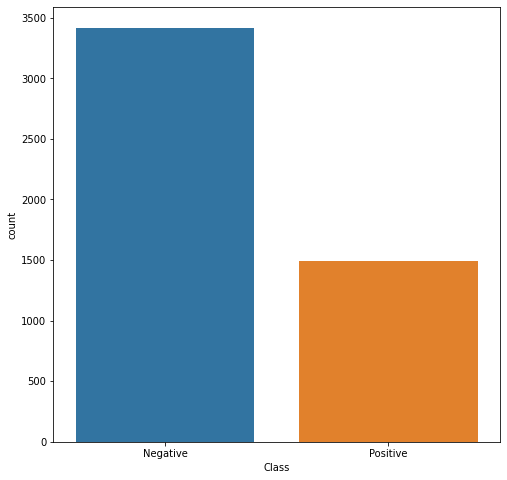

In [7]:
plt.rcParams['figure.figsize'] = (8,8)

DataFrame['Class'].value_counts()
g = sns.countplot(DataFrame['Class'])
g.set_xticklabels(['Negative','Positive'])
plt.show()

The above bar chart helps illustrate the extent of the imbalance.

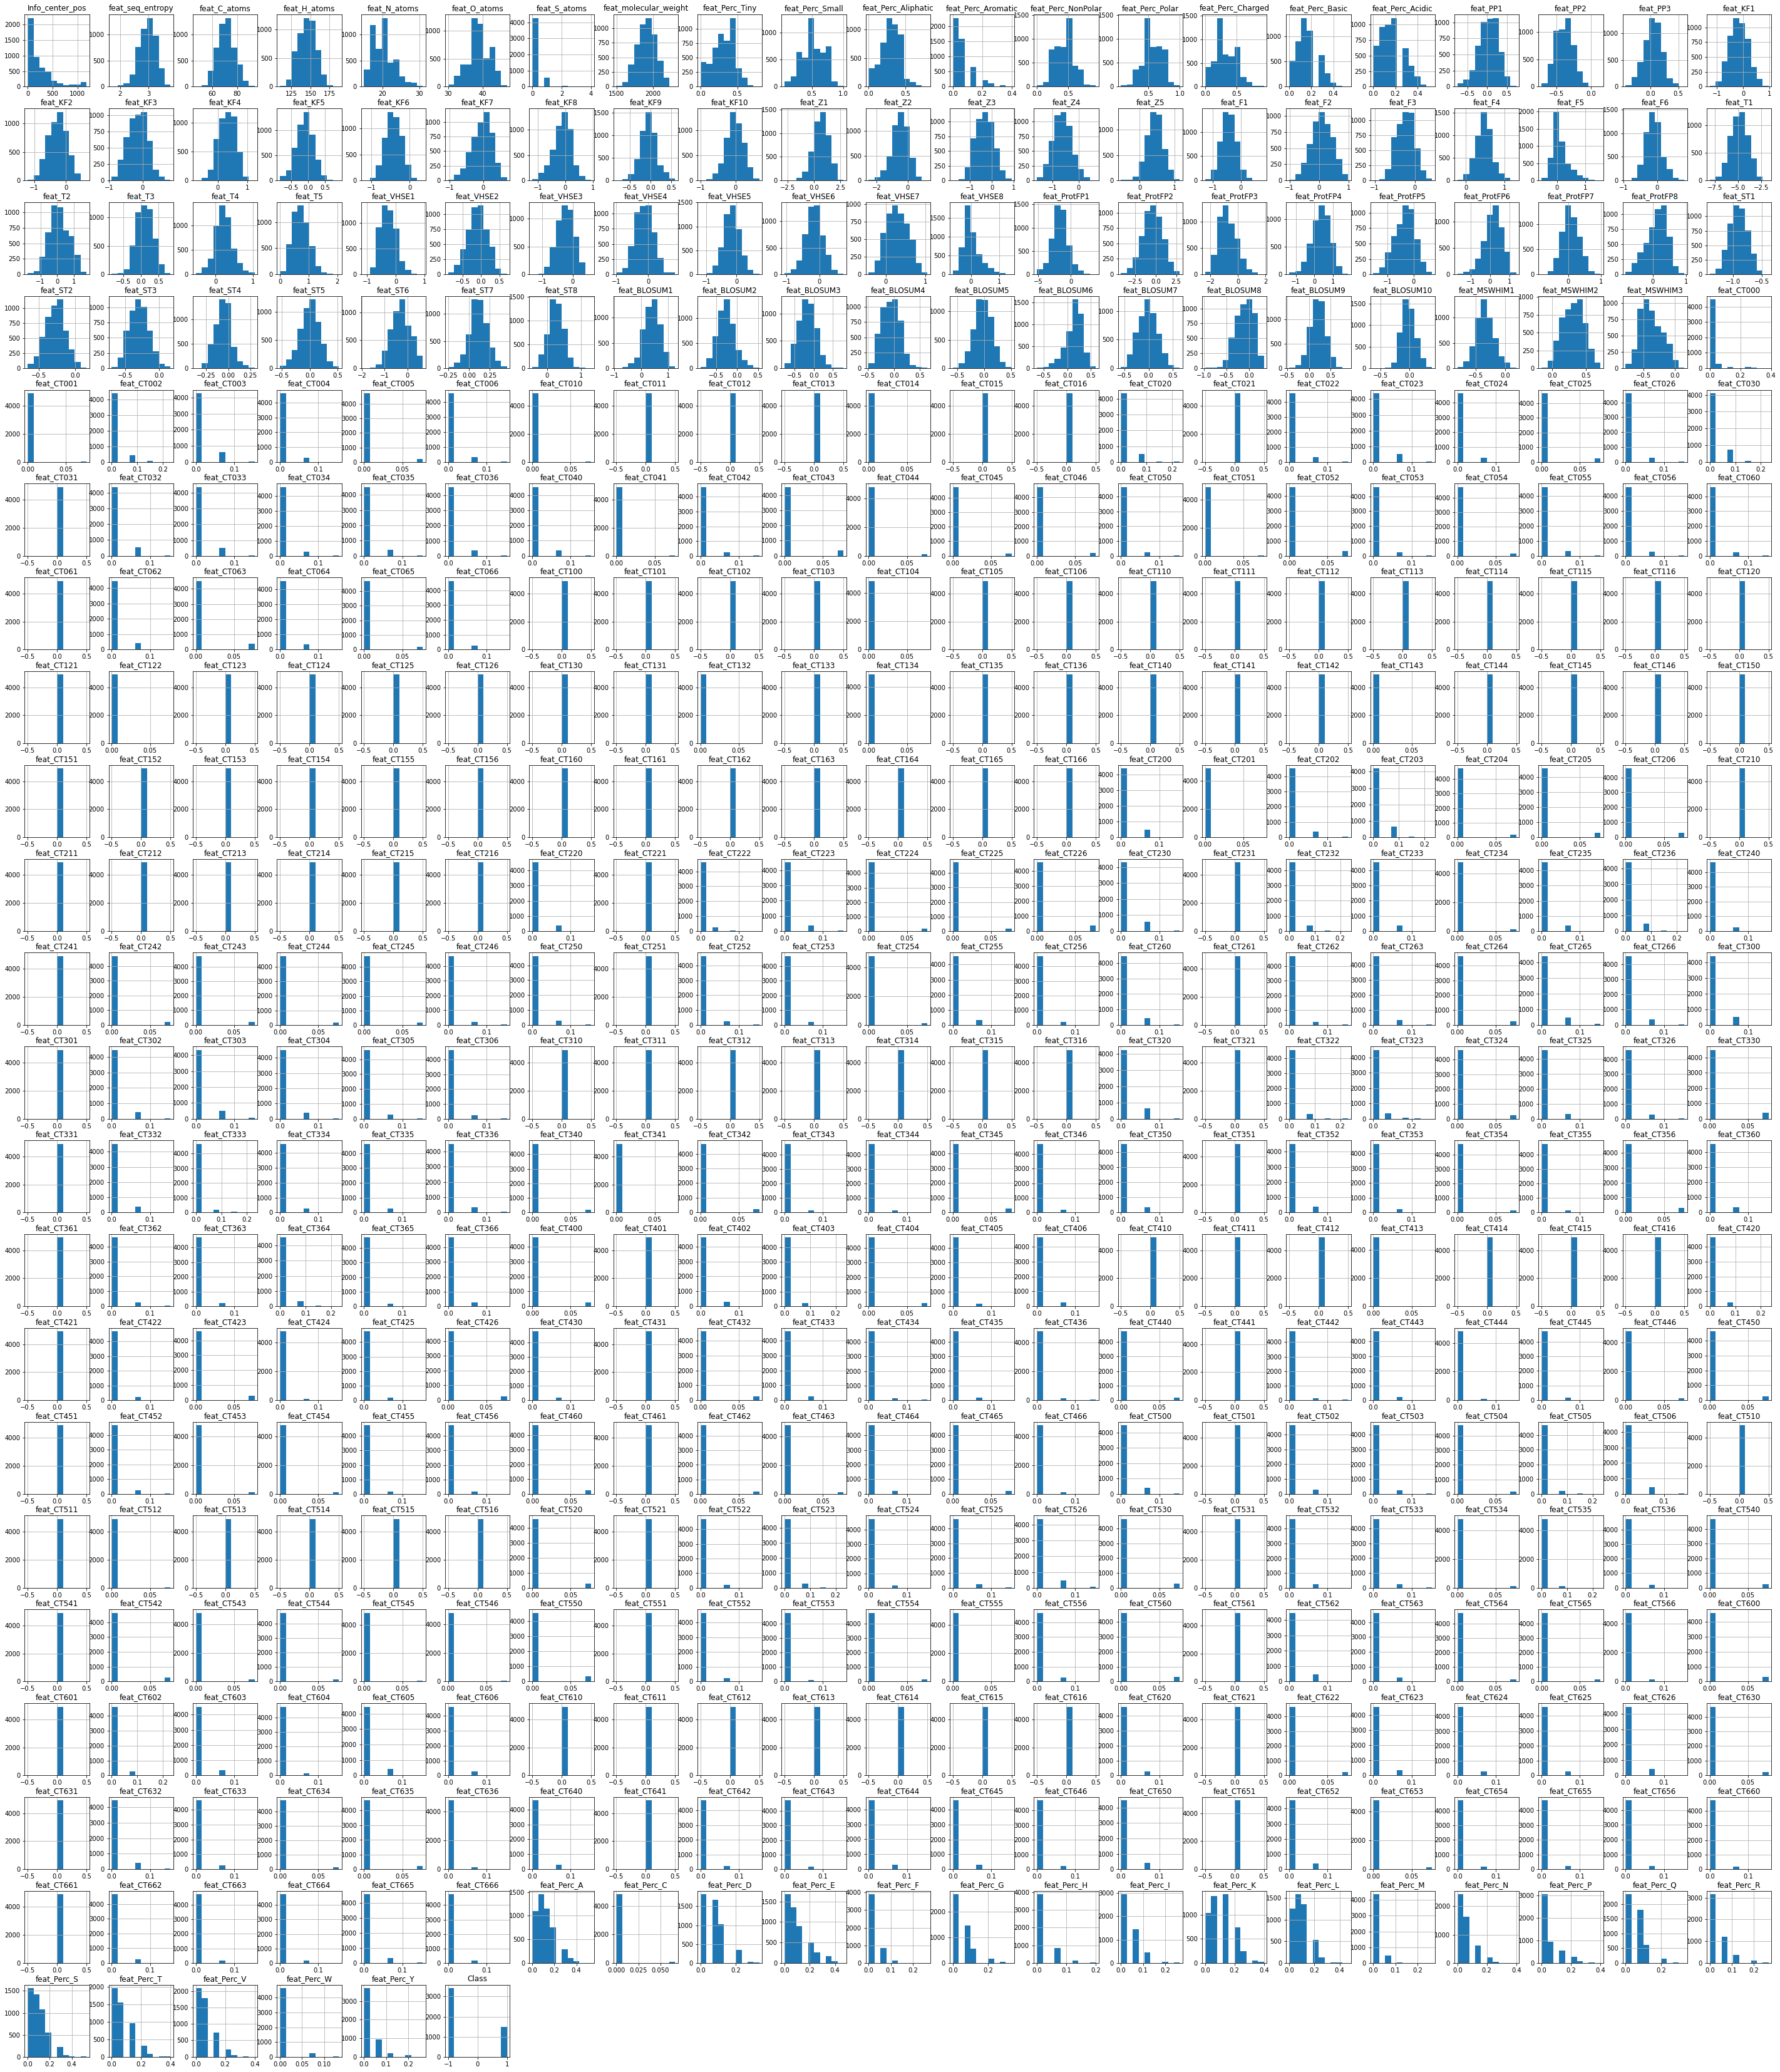

In [8]:
#Plotting histograms of the features in the DataFrame
plt.rcParams['figure.figsize'] = (50.0,60.0)
DataFrame.hist()
plt.show()

In [9]:
#Selecting the features that will be used for our data analysis and buildng of our model
Features = DataFrame.filter(regex="^feat")
Features.info

<bound method DataFrame.info of       feat_seq_entropy  feat_C_atoms  ...  feat_Perc_W  feat_Perc_Y
0             3.056565            62  ...          0.0          0.0
1             3.056565            61  ...          0.0          0.0
2             2.923231            61  ...          0.0          0.0
3             2.923231            63  ...          0.0          0.0
4             2.739572            65  ...          0.0          0.0
...                ...           ...  ...          ...          ...
4902          2.706891            63  ...          0.0          0.0
4903          2.523231            64  ...          0.0          0.0
4904          2.523231            66  ...          0.0          0.0
4905          2.739572            70  ...          0.0          0.0
4906          2.822580            67  ...          0.0          0.0

[4907 rows x 445 columns]>

In [10]:
#Assigning the Class feature
Class = DataFrame['Class']
print(Class)

0       1
1       1
2       1
3       1
4       1
       ..
4902   -1
4903   -1
4904   -1
4905   -1
4906   -1
Name: Class, Length: 4907, dtype: int64


In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

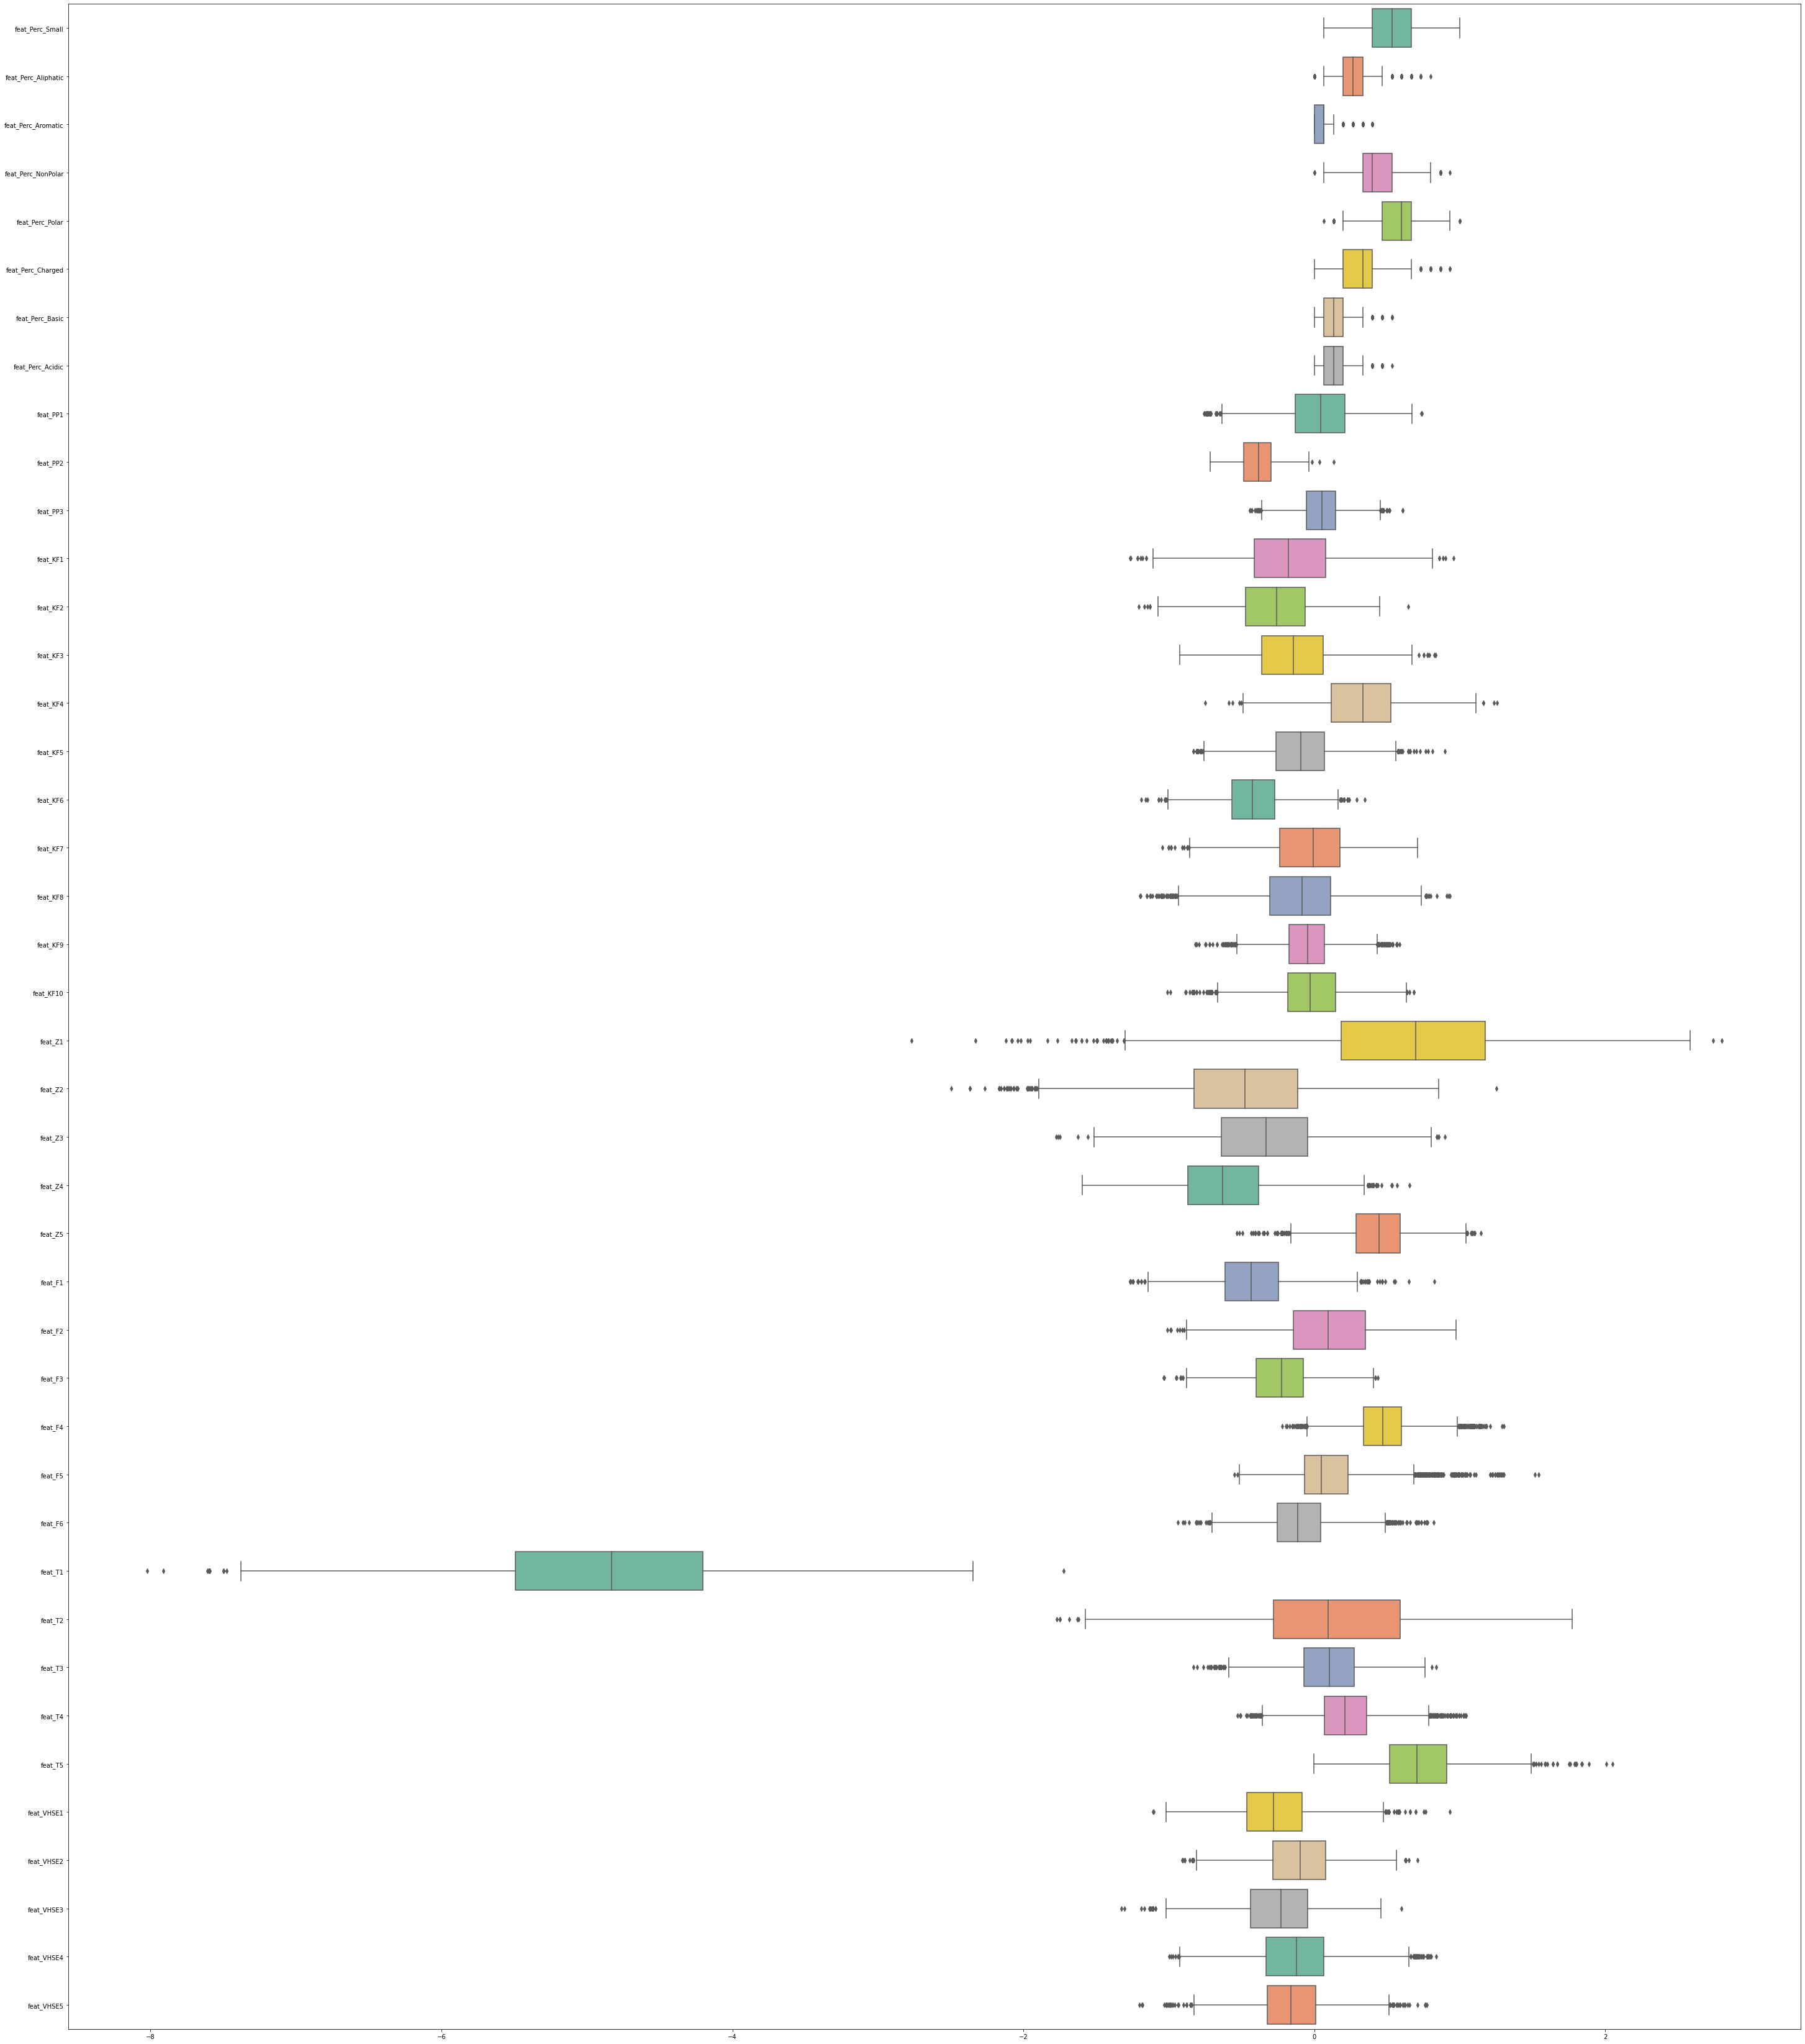

In [12]:
ax = sns.boxplot(data=Features.iloc[:,8:50], orient="h", palette="Set2")

In [13]:
#This code uses D’Agostino’s K-squared test to prove statistically whether features are normally distributed or not
from scipy.stats import normaltest
normalised_features = 0
not_normalised_features = 0

for i in Features.columns:
  
  stat,p = normaltest(Features[[i]])
  
  if p < 0.05:
    not_normalised_features += 1
  else:
    normalised_features +=1


In [14]:
#Following the D’Agostino’s K-squared test we can see that all but one feature is not normally distributed
print("Normalised features: " + str(normalised_features))
print("Not normalised features: " + str(not_normalised_features))

Normalised features: 1
Not normalised features: 444


We can observe from the histograms and box plots that the data features are generally not distributed. Furthermore, using D'Agostino's K-squared test, the preceding code statistically demonstrates that the characteristics are mostly not normally distributed. Scipy.stats.normaltest can determine whether or not our sample has a normal distribution. It is based on D'Agostino's and Pearson's tests, and it returns the z score for the skewness and kurtosis tests (stat) and a 2-sided chi-squared probability for the hypothesis test (p-value). [6]

# BENCH MARKING

It is important to include benchmark models in our report. This allows us to be able to compare or final product after pre-processing to a naive solution. In the below section, the holdout method is used to score and evaluate models, with an 80-20 split of the data. A simple PCA is run on the data to reduce the features to ten principal components instead of training models on 455 features to save computational power. As part of this Data Mining report, we will consider the following machine learning models to predict the epitopes:
* KNeighborsClassifier
* RandomForestClassifier
* Perceptron
* DecisionTreeClassifier
* LogisticRegression
* SupportVectorClassifier

We will also consider the following Cost-Sensitive models:
* RandomForestClassifier(class_weight='balanced')
* DecisionTreeClassifier(class_weight='balanced')
* SupportVectorClassifier(class_weight='balanced')

As a quick initial assessment of the models' performances, a confusion matrix and and and classification report will be printed as well as MCC. In this report's final modelling and evaluation stage, the best model will be selected using one of these scoring methods.




In [15]:
#Splits the data into 80 % train and 20 % test data for use in our bench models
X_train_Bench,X_test_Bench,Y_train_Bench,Y_test_Bench = train_test_split(Features,Class, train_size = 0.8, random_state = 0)

In [16]:
from sklearn.decomposition import PCA
# Fitting PCA with 10 PC's on the training data set 
PCA = PCA(n_components = 10)
PCA.fit(X_train_Bench)
X_train_Bench_PCA = PCA.transform(X_train_Bench)

In [17]:
# Fitting PCA with 10 PC's on the testing data set
PCA.fit(X_test_Bench)
X_test_Bench_PCA = PCA.transform(X_test_Bench)

In [18]:
#Confirming that the dataset has now been reduced to 10 principle components
print(X_train_Bench_PCA.shape)
print("**")
print(X_test_Bench_PCA.shape)

(3925, 10)
**
(982, 10)


In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_bench=KNN(n_neighbors=2)
knn_bench = knn_bench.fit(X_train_Bench_PCA,Y_train_Bench)

In [20]:
y_prediction_knn_Bench=knn_bench.predict(X_test_Bench_PCA)
#evaluate the knn using confusion matrix,precision,recall and F1 score
from sklearn.metrics import matthews_corrcoef as MCC
knn_bench_MCC = MCC(Y_test_Bench,y_prediction_knn_Bench)
print(knn_bench_MCC)


0.33396177125609333


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test_Bench,y_prediction_knn_Bench))
print(classification_report(Y_test_Bench,y_prediction_knn_Bench))

[[627  71]
 [174 110]]
              precision    recall  f1-score   support

          -1       0.78      0.90      0.84       698
           1       0.61      0.39      0.47       284

    accuracy                           0.75       982
   macro avg       0.70      0.64      0.65       982
weighted avg       0.73      0.75      0.73       982



In [22]:
from sklearn.ensemble import RandomForestClassifier
# define random forest classifier
forest_bench = RandomForestClassifier( random_state=0)
forest_bench.fit(X_train_Bench_PCA, Y_train_Bench)

y_prediction_forest_bench = forest_bench.predict(X_test_Bench_PCA)
forest_bench_MCC = MCC(Y_test_Bench,y_prediction_forest_bench)
print(forest_bench_MCC)

0.31337332387601036


In [23]:
print(confusion_matrix(Y_test_Bench,y_prediction_forest_bench))
print(classification_report(Y_test_Bench,y_prediction_forest_bench))

[[641  57]
 [190  94]]
              precision    recall  f1-score   support

          -1       0.77      0.92      0.84       698
           1       0.62      0.33      0.43       284

    accuracy                           0.75       982
   macro avg       0.70      0.62      0.64       982
weighted avg       0.73      0.75      0.72       982



In [24]:
from sklearn.linear_model import Perceptron

p_bench = Perceptron() # Initialise the model we are using
p_bench = p_bench.fit(X_train_Bench_PCA, Y_train_Bench)
y_prediction_Perceptron_Bench = p_bench.predict(X_test_Bench_PCA)
p_bench_MCC = MCC(Y_test_Bench,y_prediction_Perceptron_Bench)
print(p_bench_MCC)

-0.0013521474414083577


In [25]:
print(confusion_matrix(Y_test_Bench,y_prediction_Perceptron_Bench))
print(classification_report(Y_test_Bench,y_prediction_Perceptron_Bench))

[[562 136]
 [229  55]]
              precision    recall  f1-score   support

          -1       0.71      0.81      0.75       698
           1       0.29      0.19      0.23       284

    accuracy                           0.63       982
   macro avg       0.50      0.50      0.49       982
weighted avg       0.59      0.63      0.60       982



In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtmodel_bench=DecisionTreeClassifier(random_state=0)
dtmodel_bench.fit(X_train_Bench_PCA,Y_train_Bench)
#make prediction on our test data
y_pred_DT_Bench=dtmodel_bench.predict(X_test_Bench_PCA)
dtmodel_bench_MCC= MCC(Y_test_Bench, y_pred_DT_Bench)

print(dtmodel_bench_MCC)

0.15305652121930027


In [28]:
print(confusion_matrix(Y_test_Bench,y_pred_DT_Bench))
print(classification_report(Y_test_Bench,y_pred_DT_Bench))

[[497 201]
 [157 127]]
              precision    recall  f1-score   support

          -1       0.76      0.71      0.74       698
           1       0.39      0.45      0.42       284

    accuracy                           0.64       982
   macro avg       0.57      0.58      0.58       982
weighted avg       0.65      0.64      0.64       982



In [29]:
from sklearn.linear_model import LogisticRegression

lrmodel_bench=LogisticRegression()

lrmodel_bench.fit(X_train_Bench_PCA,Y_train_Bench)
#make prediction on our test dat
Y_pred_LR_BENCH=lrmodel_bench.predict(X_test_Bench_PCA)
lrmodel_bench_MCC = MCC(Y_test_Bench, Y_pred_LR_BENCH)
print(lrmodel_bench_MCC)

0.2957750743562731


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
print(confusion_matrix(Y_test_Bench,Y_pred_LR_BENCH))
print(classification_report(Y_test_Bench,Y_pred_LR_BENCH))

[[584 114]
 [158 126]]
              precision    recall  f1-score   support

          -1       0.79      0.84      0.81       698
           1       0.53      0.44      0.48       284

    accuracy                           0.72       982
   macro avg       0.66      0.64      0.65       982
weighted avg       0.71      0.72      0.72       982



In [31]:
from sklearn.svm import SVC

#Training the SVC model on train data
svc_bench = SVC()
svc_bench.fit(X_train_Bench_PCA, Y_train_Bench)
y_pred_svc_bench = svc_bench.predict(X_test_Bench_PCA)

svc_bench_MCC = MCC(Y_test_Bench,y_pred_svc_bench)

print(svc_bench_MCC)

0.3731580233814911


In [32]:
print(confusion_matrix(Y_test_Bench,y_pred_svc_bench))
print(classification_report(Y_test_Bench,y_pred_svc_bench))

[[628  70]
 [163 121]]
              precision    recall  f1-score   support

          -1       0.79      0.90      0.84       698
           1       0.63      0.43      0.51       284

    accuracy                           0.76       982
   macro avg       0.71      0.66      0.68       982
weighted avg       0.75      0.76      0.75       982



### Cost-Sensitive Models

In [33]:
# define class sensitive random forest classifier
forest_balanced = RandomForestClassifier( class_weight='balanced', random_state=0)
forest_balanced.fit(X_train_Bench_PCA, Y_train_Bench)

y_prediction_forest_bench_balanced = forest_balanced.predict(X_test_Bench_PCA)

forest_bal_bench_MCC = MCC(Y_test_Bench,y_prediction_forest_bench_balanced)

print(forest_bal_bench_MCC)

0.2763343750317612


In [34]:
print(confusion_matrix(Y_test_Bench,y_prediction_forest_bench_balanced))
print(classification_report(Y_test_Bench,y_prediction_forest_bench_balanced))

[[653  45]
 [209  75]]
              precision    recall  f1-score   support

          -1       0.76      0.94      0.84       698
           1       0.62      0.26      0.37       284

    accuracy                           0.74       982
   macro avg       0.69      0.60      0.60       982
weighted avg       0.72      0.74      0.70       982



In [35]:
dtmodel_balanced=DecisionTreeClassifier(class_weight='balanced',random_state=0)
dtmodel_balanced.fit(X_train_Bench_PCA,Y_train_Bench)
#make prediction on our test data
y_pred_DT_Bench_balanced=dtmodel_balanced.predict(X_test_Bench_PCA)

dtmodel_bal_bench_MCC = MCC(Y_test_Bench, y_pred_DT_Bench_balanced)
print(dtmodel_bal_bench_MCC)

0.22382854098839597


In [36]:
print(confusion_matrix(Y_test_Bench,y_pred_DT_Bench_balanced))
print(classification_report(Y_test_Bench,y_pred_DT_Bench_balanced))

[[536 162]
 [154 130]]
              precision    recall  f1-score   support

          -1       0.78      0.77      0.77       698
           1       0.45      0.46      0.45       284

    accuracy                           0.68       982
   macro avg       0.61      0.61      0.61       982
weighted avg       0.68      0.68      0.68       982



In [37]:
#Training the SVC model on train data
svc_bench_balanced = SVC(random_state=0, class_weight='balanced')
svc_bench_balanced.fit(X_train_Bench_PCA, Y_train_Bench)
y_pred_svc_bench_balanced = svc_bench_balanced.predict(X_test_Bench_PCA)

svc_bal_bench_MCC = MCC(Y_test_Bench,y_pred_svc_bench_balanced)

print(svc_bal_bench_MCC)

0.41326085970226845


In [38]:
print(confusion_matrix(Y_test_Bench,y_pred_svc_bench_balanced))
print(classification_report(Y_test_Bench,y_pred_svc_bench_balanced))

[[538 160]
 [ 95 189]]
              precision    recall  f1-score   support

          -1       0.85      0.77      0.81       698
           1       0.54      0.67      0.60       284

    accuracy                           0.74       982
   macro avg       0.70      0.72      0.70       982
weighted avg       0.76      0.74      0.75       982



# DATA PREPROCESSING

In this section of the report, we will address some of our data set's characteristics to improve models. From data exploration, we have discovered that the data :
* Is not normally distributed
* May contain outliers
* Is imbalanced in favour of negative epitopes

The first step in our data pre-processing is to address any potential data quality issues. Further examination of the data shows no duplicate data, nor are there any missing values. This is important, as duplicate values would have to be removed beforehand if they were present as they can affect our models. Since this data set comprises the merging of data from two different sources, it is important to rule out any data that is duplicate or near-duplicate. If there were any missing values present, a decision would have to be made on addressing these. Some methods can include imputing mean/median values; however, significant missing values might be better served by removing the responsible data object if possible.

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(Features,Class, train_size = 0.8, random_state = 0)

## Dupplicate values

In [40]:
duplicate_data = DataFrame[DataFrame.duplicated(keep=False)]
duplicate_data.shape

(0, 451)

In [41]:
DataFrame.duplicated(keep=False).sum()

0

## Missing values

In [42]:
X_train.isnull().sum().sort_values(ascending = False).head(10)

feat_Perc_Y    0
feat_CT126     0
feat_CT112     0
feat_CT113     0
feat_CT114     0
feat_CT115     0
feat_CT116     0
feat_CT120     0
feat_CT121     0
feat_CT122     0
dtype: int64

In [43]:
X_test.isnull().sum().sort_values(ascending = False).head(10)

feat_Perc_Y    0
feat_CT126     0
feat_CT112     0
feat_CT113     0
feat_CT114     0
feat_CT115     0
feat_CT116     0
feat_CT120     0
feat_CT121     0
feat_CT122     0
dtype: int64

## Sampling

Since we have discovered an imbalance issue present in our data set, this has to be addressed. As part of our solution, we will examine both cost-sensitive and non-cost sensitive models. As the name suggests, cost-sensitive models take into account the class weight and address imbalances. The cost-sensitive models used in this report all have a cost-sensitive extension, which will be used to build a balanced model. For the models that will run without this extension, the imbalance has to be addressed differently. We will be using the SMOTE oversampling technique to create additional data variables of the minority(positive) class. [1]

In [44]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_train_OS,Y_train_OS =oversample.fit_resample(X_train,Y_train)
print('Oversampled feature data shape: '+str(X_train_OS.shape))
print('Oversampled Class data shape: '+str(Y_train_OS.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Oversampled feature data shape: (5440, 445)
Oversampled Class data shape: (5440,)


In [45]:
#Use pandas value counts to check that the class data set is now balanced
pd.value_counts(Y_train_OS)

-1    2720
 1    2720
dtype: int64

## Scaling

In this section, we use RobustScaler to scale and fit our training and test sets. This is an essential step and decision for the pre-processing of our data. The RobustScaler allows for standardisation of the datasets without being affected too much by any potential outliers. Our earlier data exploration showed that our dataset did contain outliers, making this the most suitable choice for scaling our data. [1]

RobustScaler can be robust to the effects of outliers by removing the median and scaling the data but the interquartile range. Many machine learning estimators perform better when a dataset has been standardised. It's usually done by eliminating the mean and scaling the data down to unit variances. Outliers, on the other hand, might have a negative impact on the sample mean/variance. As a result, the median and the interquartile range are typically more useful in such instances. [1]

In [46]:
from sklearn.preprocessing import RobustScaler

X_train = pd.DataFrame(RobustScaler().fit_transform(X_train))
X_train.describe

<bound method NDFrame.describe of            0    1         2     3     4    ...  440  441  442       443  444
0     0.584963  1.4  0.705882  0.00 -0.75  ...  0.0  0.0  0.0  0.066667  2.0
1    -0.333333 -0.3 -0.058824  0.25 -0.50  ...  0.0  0.5  2.0  0.000000  0.0
2    -0.540852  0.6 -0.705882 -0.50  0.50  ...  1.0 -0.5 -1.0  0.000000  4.0
3    -0.349978  1.0  0.764706  0.25  1.25  ...  0.0  0.0 -1.0  0.000000  1.0
4     0.125815  0.7  0.411765 -0.25  0.75  ...  0.5  0.5 -1.0  0.000000  0.0
...        ...  ...       ...   ...   ...  ...  ...  ...  ...       ...  ...
3920 -0.540852  0.5  0.764706  0.25  0.00  ...  0.0 -0.5 -1.0  0.000000  0.0
3921  0.000000 -0.1  0.000000 -0.50  0.00  ...  1.0  0.5  2.0  0.000000  0.0
3922  0.251629  0.5  0.235294  0.50 -0.25  ...  0.0 -0.5 -1.0  0.000000  0.0
3923  0.333333 -0.1  0.294118  0.75  0.00  ...  0.0 -0.5  0.0  0.000000  0.0
3924  0.125815 -0.6 -0.764706 -0.25  0.25  ...  0.0  0.0 -1.0  0.000000  0.0

[3925 rows x 445 columns]>

In [47]:
X_test = pd.DataFrame(RobustScaler().fit_transform(X_test))
X_test.describe

<bound method NDFrame.describe of           0         1       2     3     4    ...  440  441  442  443       444
0   -0.459148  0.111111  0.0625  0.50  0.50  ... -0.5  0.0 -1.0  0.0  0.000000
1   -0.251629  0.666667  1.1250  0.75  0.50  ... -0.5  0.0 -1.0  0.0  0.000000
2    0.333333 -0.555556 -0.1250 -0.25 -0.25  ...  0.0  0.0  0.0  0.0  0.000000
3    0.874185  0.111111 -0.5625 -0.50  0.25  ...  1.0 -0.5  0.0  0.0  0.066667
4    0.000000 -1.444444 -0.8125  0.00 -1.50  ...  0.5 -0.5  0.0  0.0  0.000000
..        ...       ...     ...   ...   ...  ...  ...  ...  ...  ...       ...
977 -1.377444  1.111111  1.3125  0.50  1.25  ... -0.5 -0.5 -1.0  0.0  0.000000
978  0.207519 -1.333333 -1.3750 -0.75 -0.25  ...  1.5  0.0  0.0  0.0  0.000000
979 -1.459148  1.000000  1.3125  0.50  1.00  ... -0.5 -0.5 -1.0  0.0  0.000000
980 -0.710777 -0.555556 -0.2500 -0.75  0.75  ...  1.0  1.0  1.0  0.0  0.000000
981  1.000000  0.666667  0.0000 -0.25  0.75  ... -0.5  0.0 -1.0  0.0  0.133333

[982 rows x 445 c

In [48]:
X_train_OS = pd.DataFrame(RobustScaler().fit_transform(X_train_OS))
X_train.describe

<bound method NDFrame.describe of            0    1         2     3     4    ...  440  441  442       443  444
0     0.584963  1.4  0.705882  0.00 -0.75  ...  0.0  0.0  0.0  0.066667  2.0
1    -0.333333 -0.3 -0.058824  0.25 -0.50  ...  0.0  0.5  2.0  0.000000  0.0
2    -0.540852  0.6 -0.705882 -0.50  0.50  ...  1.0 -0.5 -1.0  0.000000  4.0
3    -0.349978  1.0  0.764706  0.25  1.25  ...  0.0  0.0 -1.0  0.000000  1.0
4     0.125815  0.7  0.411765 -0.25  0.75  ...  0.5  0.5 -1.0  0.000000  0.0
...        ...  ...       ...   ...   ...  ...  ...  ...  ...       ...  ...
3920 -0.540852  0.5  0.764706  0.25  0.00  ...  0.0 -0.5 -1.0  0.000000  0.0
3921  0.000000 -0.1  0.000000 -0.50  0.00  ...  1.0  0.5  2.0  0.000000  0.0
3922  0.251629  0.5  0.235294  0.50 -0.25  ...  0.0 -0.5 -1.0  0.000000  0.0
3923  0.333333 -0.1  0.294118  0.75  0.00  ...  0.0 -0.5  0.0  0.000000  0.0
3924  0.125815 -0.6 -0.764706 -0.25  0.25  ...  0.0  0.0 -1.0  0.000000  0.0

[3925 rows x 445 columns]>

## Feature extraction 

### Correlated features

In [49]:
corr_features = set()
corr_matrix = Features.corr()

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
print(len(corr_features))
print(corr_features)

22
{'feat_MSWHIM1', 'feat_ST1', 'feat_CT201', 'feat_CT143', 'feat_ST6', 'feat_BLOSUM3', 'feat_VHSE2', 'feat_F2', 'feat_T1', 'feat_BLOSUM1', 'feat_CT010', 'feat_ProtFP2', 'feat_Perc_M', 'feat_CT512', 'feat_CT104', 'feat_PP1', 'feat_F3', 'feat_Perc_Polar', 'feat_VHSE1', 'feat_KF2', 'feat_VHSE3', 'feat_Perc_P'}


From a simple analysis of features in the data set, we can see that 22 features are highly correlated at 90% and above. This indicates that our models can benefit significantly from dimensionality reduction and feature extraction.

PCA

We utilise PCA in this report (Principal Component Analysis). Features may be extracted using PCA, a linear algebra method. As a result, it creates a new set of components called principal components. Then, as a linear combination of the original characteristics, these new qualities are ranked by the amount of variation they explain the data. In this way, we may pick a sufficient number of PCs to account for the variance in our data. [7]

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


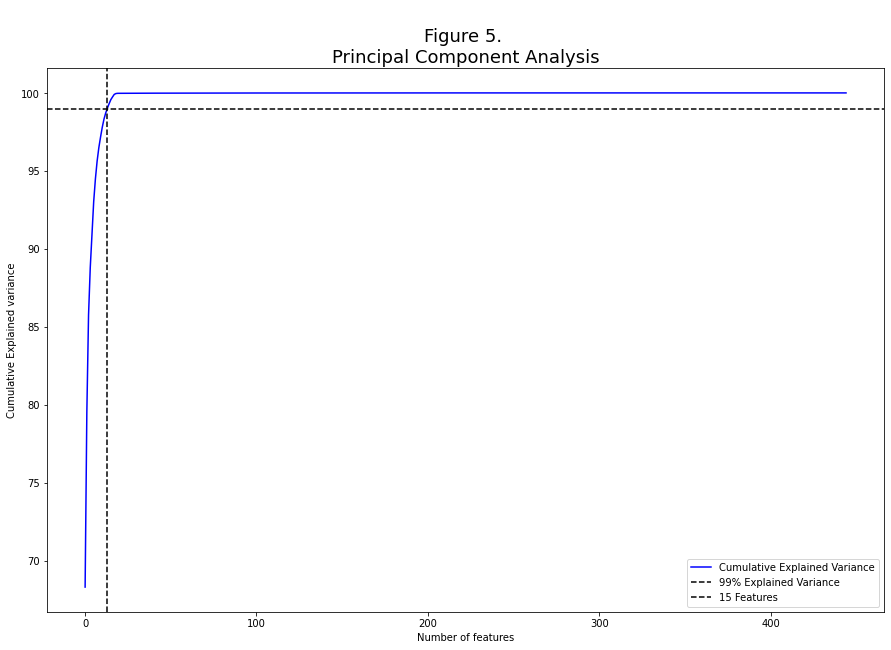

In [50]:
#Running a pca on the oversampled dataset 
from sklearn.decomposition import PCA

pca = PCA()
train_pca_OS = pca.fit_transform(X_train_OS)
cum_var = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cum_var))]

plt.figure(figsize=(15, 10))
plt.plot(d,cum_var, color = 'b',label='Cumulative Explained Variance')
plt.title('\nFigure 5. \nPrincipal Component Analysis', fontname="Cambria", fontsize=18)
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Number of features')

plt.axhline(y = 99, color='k', linestyle='--', label = '99% Explained Variance')
plt.axvline(x = 13, color='k', linestyle='--', label = '15 Features')
plt.legend(loc='best')

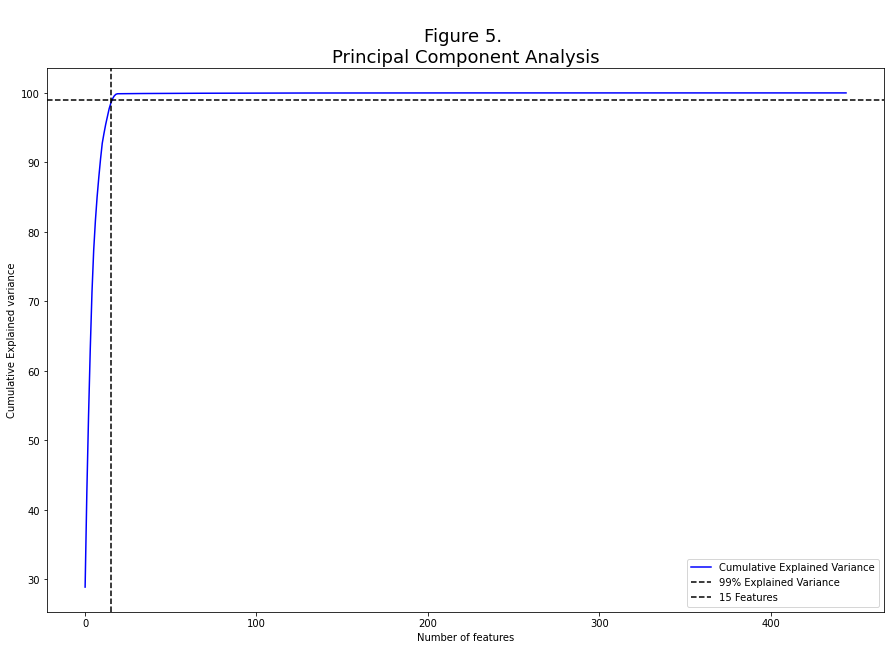

In [51]:
#Running a pca on the dataset that is not oversampled
pca = PCA()
train_pca = pca.fit_transform(X_train)
cum_var = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cum_var))]

plt.figure(figsize=(15, 10))
plt.plot(d,cum_var, color = 'b',label='Cumulative Explained Variance')
plt.title('\nFigure 5. \nPrincipal Component Analysis', fontname="Cambria", fontsize=18)
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Number of features')

plt.axhline(y = 99, color='k', linestyle='--', label = '99% Explained Variance')
plt.axvline(x = 15, color='k', linestyle='--', label = '15 Features')
plt.legend(loc='best')

In [52]:
pca1 = PCA(n_components = 15)
train_pca = pca1.fit_transform(X_train)


In [53]:
pca2 = PCA(n_components = 15)
train_pca_OS = pca2.fit_transform(X_train_OS)

In [54]:
print("Oversampled explained variance ratio:\n\n", pca2.explained_variance_ratio_)
print("\nsum of explained variance ratio for Oversampled PCA:\n\n",sum(pca2.explained_variance_ratio_))

Oversampled explained variance ratio:

 [0.68306185 0.11196366 0.06262051 0.03038903 0.02166279 0.02053831
 0.01458857 0.01139591 0.00864343 0.00682213 0.00626165 0.00523201
 0.00391172 0.00315425 0.00282944]

sum of explained variance ratio for Oversampled PCA:

 0.993075271579242


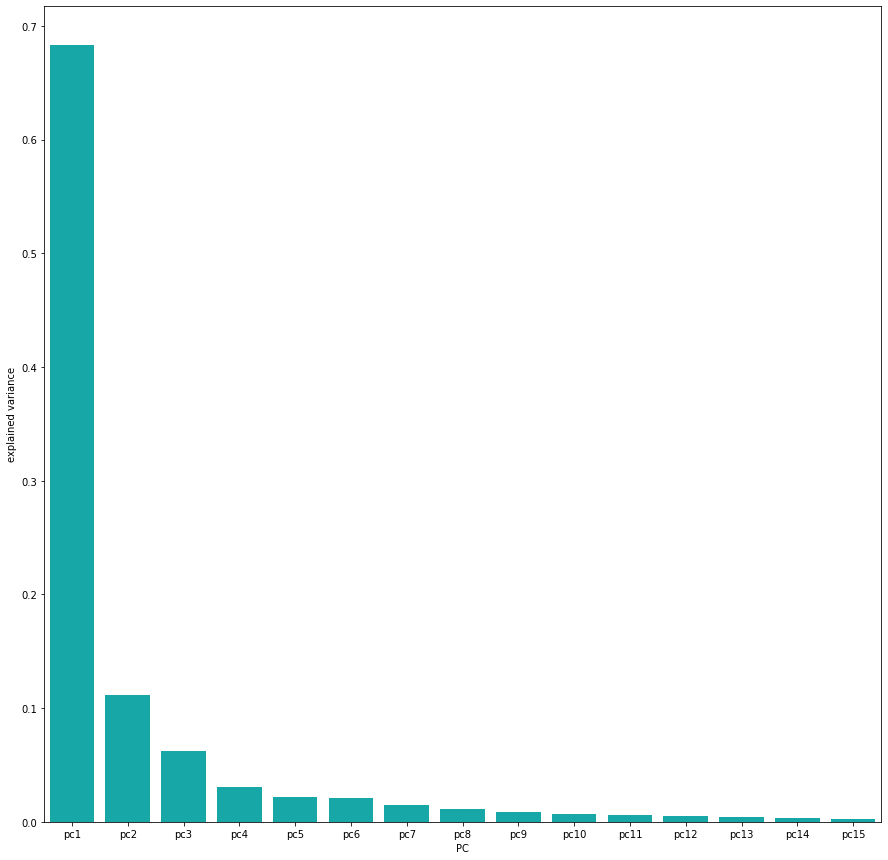

In [55]:
import seaborn as sns
#Oversampled data
#calculating the explained variance ratio for each component
explained_var_ratio = pd.DataFrame({'explained variance':pca2.explained_variance_ratio_,
             'PC':['pc1','pc2','pc3','pc4','pc5','pc6',
                  'pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']})
plt.figure(figsize= (15,15))
# plotting the ratio of the explained ratio each comonent accounts for 
sns.barplot(x='PC',y="explained variance", 
           data=explained_var_ratio, color="c");

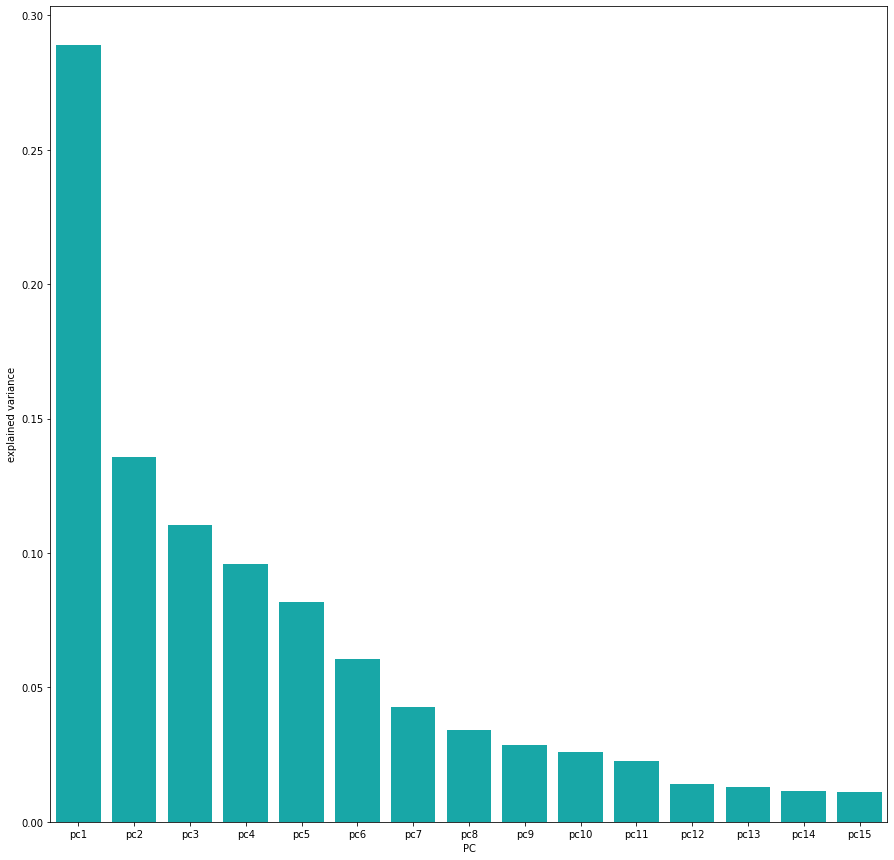

In [56]:
#not oversampled
#calculating the explained variance ratio for each component
explained_var_ratio = pd.DataFrame({'explained variance':pca1.explained_variance_ratio_,
             'PC':['pc1','pc2','pc3','pc4','pc5','pc6',
                  'pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15']})
plt.figure(figsize= (15,15))
# plotting the ratio of the explained ratio each comonent accounts for 
sns.barplot(x='PC',y="explained variance", 
           data=explained_var_ratio, color="c");

The above charts and graphs show that running PCA on the oversampled and non-oversampled data produces slightly different results. The oversampled dataset needs fewer Principal Components to explain 99% of the variance (13 vs 15). This is expected as the oversampled dataset contains more duplicates to make up for the imbalance; these duplicates would all be easier to explain through the principal components. As we are not oversampling our test data set, we will continue to the next stage with 15 PCs for our modelling.

# Modelling

KNN

The letter K in the classifier's name stands for the k nearest neighbours, where k is an integer number given by the user. As a result, as the name implies, this classifier employs learning based on the k nearest neighbours. The data determine the value of k.[1] As our dependant variable(Class) has two possible values, the number of nearest neighbours used in our project is 2.

Another variable that can affect the performance of this classifier is distance weighting. [1] We have chosen to keep this variable as its default, "uniform" in our modelling process. This is done deliberately because other measures have been taken to address imbalances, such as SMOTE.

In [57]:
test_pca = pca1.fit_transform(X_test)

In [58]:
test_pca_OS = pca2.fit_transform(X_test)

In [59]:

knn2=KNN(n_neighbors=2)
knn2 = knn2.fit(train_pca_OS,Y_train_OS)

y_prediction_knn=knn2.predict(test_pca_OS)

knn_MCC = MCC(Y_test,y_prediction_knn)
print(knn_MCC)



0.18166426195839575


In [60]:
print(confusion_matrix(Y_test,y_prediction_knn))
print(classification_report(Y_test,y_prediction_knn))

[[153 545]
 [ 19 265]]
              precision    recall  f1-score   support

          -1       0.89      0.22      0.35       698
           1       0.33      0.93      0.48       284

    accuracy                           0.43       982
   macro avg       0.61      0.58      0.42       982
weighted avg       0.73      0.43      0.39       982



## RandomForestClassifier

Several decision tree classifiers are fitted to a sub-sample of the dataset in random forest, and averaging is used to enhance prediction accuracy and prevent overfitting. Throughout all our RandomForestClassifiers the random state is 0 to be able to create reproducible results. [1]

Furthermore, we engaged in parameter tuning regarding max depth to further increase the models' accuracy. GridSearchCV was employed to do an exhaustive search across the provided parameter values for an estimator. A cross-validated grid-search across a parameter grid is used to improve the parameters of the estimator used to apply these approaches.[1] The best_params_ attribute helped return the parameter value that scored the best on the holdout data. This allowed us to tune the max_depth parameter of the classifier to improve our accuracy.

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[5,10,15,20,30,40,50],}

forest2=Pipeline([('CV',GridSearchCV(RandomForestClassifier(random_state=0),parameters,cv=10))])
forest2.fit(train_pca_OS,Y_train_OS)
forest2.named_steps['CV'].best_params_

{'max_depth': 40}

In [62]:
forest2 = RandomForestClassifier(random_state=0, max_depth=20)
forest2.fit(train_pca_OS, Y_train_OS)

y_prediction_forest = forest2.predict(test_pca_OS)
forest_MCC = MCC(Y_test,y_prediction_forest)
print(forest_MCC)

0.3234527309249403


In [63]:
print(confusion_matrix(Y_test,y_prediction_forest))
print(classification_report(Y_test,y_prediction_forest))

[[445 253]
 [ 80 204]]
              precision    recall  f1-score   support

          -1       0.85      0.64      0.73       698
           1       0.45      0.72      0.55       284

    accuracy                           0.66       982
   macro avg       0.65      0.68      0.64       982
weighted avg       0.73      0.66      0.68       982



## Perceptron
Perceptron is another model from pythons Scikitlearn. This is a linear model that is used for classification in this report. 

In [64]:
p2 = Perceptron() # Initialise the model we are using
p2 = p2.fit(train_pca_OS, Y_train_OS)
y_prediction_Perceptron = p2.predict(test_pca_OS)
p2_MCC = MCC(Y_test,y_prediction_Perceptron)
print(p2_MCC)

0.4132156410847541


In [65]:
print(confusion_matrix(Y_test,y_prediction_Perceptron))
print(classification_report(Y_test,y_prediction_Perceptron))

[[431 267]
 [ 46 238]]
              precision    recall  f1-score   support

          -1       0.90      0.62      0.73       698
           1       0.47      0.84      0.60       284

    accuracy                           0.68       982
   macro avg       0.69      0.73      0.67       982
weighted avg       0.78      0.68      0.70       982



## DecisionTreeClassifier
A decision tree classifier resembles a flowchart, with the terminal nodes representing classification outputs/decisions. Entropy can be used to discover a way to divide the dataset until all of the data belongs to the same class. [8]

Similarly to RandomForestClassifier, parameter tuning was employed to optimise the value for max_depth using GridSearchCV.

In [66]:
parameters={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],}

dtmodel2=Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(random_state=0),parameters,cv=10))])
dtmodel2.fit(train_pca_OS,Y_train_OS)
dtmodel2.named_steps['CV'].best_params_

{'max_depth': 15}

In [67]:
dtmodel2=DecisionTreeClassifier(random_state=0, max_depth=12)
dtmodel2.fit(train_pca_OS,Y_train_OS)
#make prediction on our test dat
y_pred_DT=dtmodel2.predict(test_pca_OS)
dtmodel_MCC = MCC(Y_test, y_pred_DT)
print(dtmodel_MCC)

0.1885225430819475


In [68]:
print(confusion_matrix(Y_test,y_pred_DT))
print(classification_report(Y_test,y_pred_DT))

[[381 317]
 [ 96 188]]
              precision    recall  f1-score   support

          -1       0.80      0.55      0.65       698
           1       0.37      0.66      0.48       284

    accuracy                           0.58       982
   macro avg       0.59      0.60      0.56       982
weighted avg       0.68      0.58      0.60       982



## Logstic Regression
Logistic Regression is another one of SciKit: earn's linear models and uses using the 'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers to classify our data set.

In [69]:
lrmodel2=LogisticRegression()

lrmodel2.fit(train_pca_OS,Y_train_OS)
#make prediction on our test dat
Y_pred_LR=lrmodel2.predict(test_pca_OS)
lrmodel2_MCC = MCC(Y_test, Y_pred_LR)
print(lrmodel2_MCC)

0.24294211941162444


In [70]:
print(confusion_matrix(Y_test,Y_pred_LR))
print(classification_report(Y_test,Y_pred_LR))

[[336 362]
 [ 62 222]]
              precision    recall  f1-score   support

          -1       0.84      0.48      0.61       698
           1       0.38      0.78      0.51       284

    accuracy                           0.57       982
   macro avg       0.61      0.63      0.56       982
weighted avg       0.71      0.57      0.58       982



## SupportVectorClassification
C-Support Vector Classification's implementation is based on libsvm and, according to the documentation, may not be fit for use beyond tens of thousands of samples. However, it is suitable for this data set as, at most, we will pass through less than 4000 samples.

In [71]:
#Training the SVC model on train data
svc = SVC(random_state=0)
svc.fit(train_pca_OS, Y_train_OS)
y_pred_svc = svc.predict(test_pca_OS)
svc_MCC = MCC(Y_test,y_pred_svc)
print(svc_MCC)

0.21257758985301073


In [72]:
print(confusion_matrix(Y_test,y_pred_svc))
print(classification_report(Y_test,y_pred_svc))

[[113 585]
 [  3 281]]
              precision    recall  f1-score   support

          -1       0.97      0.16      0.28       698
           1       0.32      0.99      0.49       284

    accuracy                           0.40       982
   macro avg       0.65      0.58      0.38       982
weighted avg       0.79      0.40      0.34       982



## Cost-Sensitive Models

In [73]:
parameters={'max_depth':[5,10,15,20,30,40,50],}

forest2_bal=Pipeline([('CV',GridSearchCV(RandomForestClassifier(random_state=0,class_weight='balanced'),parameters,cv=10))])
forest2_bal.fit(train_pca,Y_train)
forest2_bal.named_steps['CV'].best_params_

{'max_depth': 20}

In [74]:
forest2_bal = RandomForestClassifier(random_state=0, class_weight='balanced', max_depth=20)
forest2_bal.fit(train_pca, Y_train)

y_prediction_forest_bal = forest2_bal.predict(test_pca)
forest2_bal_MCC = MCC(Y_test,y_prediction_forest_bal)
print(forest2_bal_MCC)

0.4897094525840203


In [75]:
print(confusion_matrix(Y_test,y_prediction_forest_bal))
print(classification_report(Y_test,y_prediction_forest_bal))

[[648  50]
 [142 142]]
              precision    recall  f1-score   support

          -1       0.82      0.93      0.87       698
           1       0.74      0.50      0.60       284

    accuracy                           0.80       982
   macro avg       0.78      0.71      0.73       982
weighted avg       0.80      0.80      0.79       982



In [76]:
parameters={'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],}

dtmodel2_bal=Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(random_state=0, class_weight='balanced'),parameters,cv=10))])
dtmodel2_bal.fit(train_pca,Y_train)
dtmodel2_bal.named_steps['CV'].best_params_

{'max_depth': 12}

In [77]:
dtmodel2_bal=DecisionTreeClassifier(random_state=0, class_weight='balanced',max_depth=12)
dtmodel2_bal.fit(train_pca,Y_train)
#make prediction on our test dat
y_pred_DT_bal=dtmodel2_bal.predict(test_pca)
dtmodel2_bal_MCC = MCC(Y_test, y_pred_DT_bal)
print(dtmodel2_bal_MCC)

0.3642440240256817


In [78]:
print(confusion_matrix(Y_test,y_pred_DT_bal))
print(classification_report(Y_test,y_pred_DT_bal))

[[542 156]
 [113 171]]
              precision    recall  f1-score   support

          -1       0.83      0.78      0.80       698
           1       0.52      0.60      0.56       284

    accuracy                           0.73       982
   macro avg       0.68      0.69      0.68       982
weighted avg       0.74      0.73      0.73       982



In [79]:
svc_bal = SVC(random_state=0, class_weight='balanced')
svc_bal.fit(train_pca, Y_train)
y_pred_svc_bal = svc_bal.predict(test_pca)

svc_bal_MCC = MCC(Y_test,y_pred_svc_bal)

print(svc_bal_MCC)

0.4927164456900596


# Model Evaluation and Selection
### MCC VS F1(accuracy)

Accuracy is the ratio between the properly predicted instances and the total number of instances in the dataset. [2]

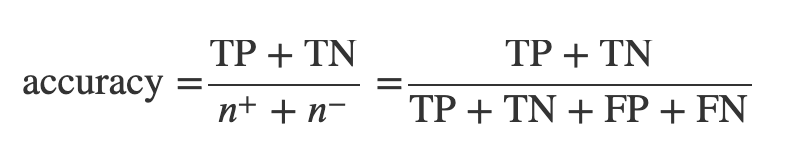

The Matthews correlation coefficient is a contingency matrix technique of computing the Pearson product-moment correlation coefficient between actual and projected data. [5]

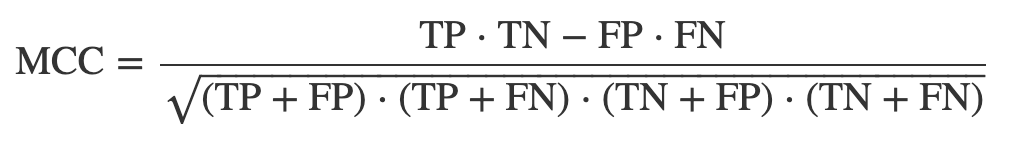

For binary and multiclass classification, the Matthews correlation coefficient is appropriate. A balanced measure that may be employed even when the classes are substantially diverse in size considers true and false positives and negatives. It is a correlation coefficient that ranges from -1 to 1. For example, the ideal prediction coefficient is 1, the average random prediction is 0, and -1 is the opposite of the prediction.[2] Also known as the phi coefficient, it is a statistical measure. [3]

When dealing with imbalanced datasets, like the dataset presented in this task, F1 scores/accuracy aren't reliable since it offers an overoptimistic assessment of the classifier's skill on the majority class. [4]

Each model prediction in this assignment has been followed by a confusion matrix, MCC, and classification report. The F1 score consistently outperforms the MCC. This is sometimes despite the fact that the confusion matrix is showing that there were more false positives than true negatives. Here is where MCC is a better metric because you cannot get a high score in MCC without performing well in all four sections of the confusion matrix(true positives and negatives, false positives and negatives)[2].


In [80]:
print("BenchMark model performances: \n")
print("\nKNeighbourClassifier MCC score =      "+str(knn_bench_MCC))
print("\nRandomForestClassifier MCC score =    "+str(forest_bench_MCC))
print("\nDecisionTreeClassifier MCC score =    "+str(dtmodel_bench_MCC))
print("\nLogisticRegression MCC score =        "+str(lrmodel_bench_MCC))
print("\nPerceptron MCC score =               "+str(p_bench_MCC))
print("\nSupportVectorClassifier MCC score =   "+str(svc_bench_MCC))

BenchMark model performances: 


KNeighbourClassifier MCC score =      0.33396177125609333

RandomForestClassifier MCC score =    0.31337332387601036

DecisionTreeClassifier MCC score =    0.15305652121930027

LogisticRegression MCC score =        0.2957750743562731

Perceptron MCC score =               -0.0013521474414083577

SupportVectorClassifier MCC score =   0.3731580233814911


In [81]:
print("Cost-Sensitive BenchMark model performances: \n")
print("\nBalanced RandomForestClassifier MCC score =    "+str(forest_bal_bench_MCC))
print("\nBalanced DecisionTreeClassifier MCC score =    "+str(dtmodel_bal_bench_MCC))
print("\nBalanced SupportVectorClassifier MCC score =   "+str(svc_bal_bench_MCC))

Cost-Sensitive BenchMark model performances: 


Balanced RandomForestClassifier MCC score =    0.2763343750317612

Balanced DecisionTreeClassifier MCC score =    0.22382854098839597

Balanced SupportVectorClassifier MCC score =   0.41326085970226845


In [82]:
print("Pre-processed and oversampled model performances: \n")
print("\nKNeighbourClassifier MCC score =      "+str(knn_MCC))
print("\nRandomForestClassifier MCC score =    "+str(forest_MCC))
print("\nDecisionTreeClassifier MCC score =    "+str(dtmodel_MCC))
print("\nLogisticRegression MCC score =        "+str(lrmodel2_MCC))
print("\nPerceptron MCC score =                "+str(p2_MCC))
print("\nSupportVectorClassifier MCC score =   "+str(svc_MCC))

Pre-processed and oversampled model performances: 


KNeighbourClassifier MCC score =      0.18166426195839575

RandomForestClassifier MCC score =    0.3234527309249403

DecisionTreeClassifier MCC score =    0.1885225430819475

LogisticRegression MCC score =        0.24294211941162444

Perceptron MCC score =                0.4132156410847541

SupportVectorClassifier MCC score =   0.21257758985301073


In [83]:
print("Pre-processed Cost-Sensitive model performances(No oversampling): \n")
print("\nBalanced RandomForestClassifier MCC score =    "+str(forest2_bal_MCC))
print("\nBalanced DecisionTreeClassifier MCC score =    "+str(dtmodel2_bal_MCC))
print('\033[1m'+"\nBalanced SupportVectorClassifier MCC score =   "+str(svc_bal_MCC)+'\033[0m')

Pre-processed Cost-Sensitive model performances(No oversampling): 


Balanced RandomForestClassifier MCC score =    0.4897094525840203

Balanced DecisionTreeClassifier MCC score =    0.3642440240256817

Balanced SupportVectorClassifier MCC score =   0.4927164456900596


## Model Selection

As discussed, the chosen model will be the model that has returned the highest MCC. From the above, we can note that the svc_bal model, the cost-sensitive SupportVectorClassifier trained on the pre-processed dataset, is the best, with an MCC score of 0.493(to 3d.p.) This score was achieved using the holdout method with 20% of data that has not been exposed to the training model at all and hence should be an accurate reflection of the expected score on the official holdout data set.

## Holdout Data Prediction

In [84]:
Hold_out_DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/CW_predict.csv')
Hold_out_DF.head()

,Info_PepID,Info_protein_id,Info_center_pos,Info_AA,Info_window_seq,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,...,feat_CT641,feat_CT642,feat_CT643,feat_CT644,feat_CT645,feat_CT646,feat_CT650,feat_CT651,feat_CT652,feat_CT653,feat_CT654,feat_CT655,feat_CT656,feat_CT660,feat_CT661,feat_CT662,feat_CT663,feat_CT664,feat_CT665,feat_CT666,feat_Perc_A,feat_Perc_C,feat_Perc_D,feat_Perc_E,feat_Perc_F,feat_Perc_G,feat_Perc_H,feat_Perc_I,feat_Perc_K,feat_Perc_L,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y
0,AAB20743.1:2,AAB20743.1,42,L,LKFFEIDLTSRPAHG,3.640224,80,151,21,36,0,1983.17,0.266667,0.400000,0.266667,0.200000,0.533333,0.466667,0.333333,0.2,0.133333,-0.151333,-0.230667,0.014667,-0.106667,-0.090667,-0.181333,-0.008667,-0.149333,-0.456667,0.062667,-0.018667,0.268667,0.173333,-0.116667,-0.218667,-0.243333,-0.162000,0.308000,-0.003133,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.066667,0.066667,0.066667,0.066667,0.133333,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
1,AAB20743.1:2,AAB20743.1,43,T,KFFEIDLTSRPAHGG,3.640224,76,143,21,36,0,1927.07,0.333333,0.466667,0.200000,0.200000,0.533333,0.466667,0.333333,0.2,0.133333,-0.150000,-0.299333,0.063333,0.060000,-0.221333,-0.180667,0.054000,-0.106000,-0.327333,0.086667,0.189333,0.128000,0.142000,0.305333,-0.402667,-0.120000,-0.168667,0.226667,-0.096800,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.133333,0.066667,0.066667,0.066667,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
2,AAB20743.1:2,AAB20743.1,44,S,FFEIDLTSRPAHGGK,3.640224,76,143,21,36,0,1927.07,0.333333,0.466667,0.200000,0.200000,0.533333,0.466667,0.333333,0.2,0.133333,-0.150000,-0.299333,0.063333,0.060000,-0.221333,-0.180667,0.054000,-0.106000,-0.327333,0.086667,0.189333,0.128000,0.142000,0.305333,-0.402667,-0.120000,-0.168667,0.226667,-0.096800,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.133333,0.066667,0.066667,0.066667,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
3,AAB20743.1:2,AAB20743.1,45,R,FEIDLTSRPAHGGKT,3.640224,71,141,21,37,0,1881.00,0.400000,0.533333,0.200000,0.133333,0.466667,0.533333,0.333333,0.2,0.133333,-0.066667,-0.374000,0.126667,0.091333,-0.333333,-0.076000,0.191333,-0.127333,-0.259333,0.058000,0.039333,-0.023333,0.184000,0.636667,-0.677333,-0.265333,-0.302000,0.241333,-0.182067,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.133333,0.066667,0.066667,0.066667,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.0,0.0,0.0
4,AAB20743.1:2,AAB20743.1,46,P,EIDLTSRPAHGGKTE,3.506891,67,139,21,39,0,1862.94,0.400000,0.533333,0.200000,0.066667,0.400000,0.600000,0.400000,0.2,0.200000,0.052667,-0.442000,0.099333,0.008667,-0.386000,-0.159333,0.364667,-0.229333,-0.178667,0.016000,-0.008667,-0.160667,0.205333,1.125333,-0.789333,-0.343333,-0.540667,0.266000,-0.355133,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.133333,0.000000,0.133333,0.066667,0.066667,0.066667,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.0,0.0,0.0


In [85]:
Hold_out_Features = Hold_out_DF.filter(regex="^feat")
Hold_out_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Columns: 445 entries, feat_seq_entropy to feat_Perc_Y
dtypes: float64(314), int64(131)
memory usage: 4.1 MB


In [86]:
Hold_out_Features.head()

,feat_seq_entropy,feat_C_atoms,feat_H_atoms,feat_N_atoms,feat_O_atoms,feat_S_atoms,feat_molecular_weight,feat_Perc_Tiny,feat_Perc_Small,feat_Perc_Aliphatic,feat_Perc_Aromatic,feat_Perc_NonPolar,feat_Perc_Polar,feat_Perc_Charged,feat_Perc_Basic,feat_Perc_Acidic,feat_PP1,feat_PP2,feat_PP3,feat_KF1,feat_KF2,feat_KF3,feat_KF4,feat_KF5,feat_KF6,feat_KF7,feat_KF8,feat_KF9,feat_KF10,feat_Z1,feat_Z2,feat_Z3,feat_Z4,feat_Z5,feat_F1,feat_F2,feat_F3,feat_F4,feat_F5,feat_F6,...,feat_CT641,feat_CT642,feat_CT643,feat_CT644,feat_CT645,feat_CT646,feat_CT650,feat_CT651,feat_CT652,feat_CT653,feat_CT654,feat_CT655,feat_CT656,feat_CT660,feat_CT661,feat_CT662,feat_CT663,feat_CT664,feat_CT665,feat_CT666,feat_Perc_A,feat_Perc_C,feat_Perc_D,feat_Perc_E,feat_Perc_F,feat_Perc_G,feat_Perc_H,feat_Perc_I,feat_Perc_K,feat_Perc_L,feat_Perc_M,feat_Perc_N,feat_Perc_P,feat_Perc_Q,feat_Perc_R,feat_Perc_S,feat_Perc_T,feat_Perc_V,feat_Perc_W,feat_Perc_Y
0,3.640224,80,151,21,36,0,1983.17,0.266667,0.400000,0.266667,0.200000,0.533333,0.466667,0.333333,0.2,0.133333,-0.151333,-0.230667,0.014667,-0.106667,-0.090667,-0.181333,-0.008667,-0.149333,-0.456667,0.062667,-0.018667,0.268667,0.173333,-0.116667,-0.218667,-0.243333,-0.162000,0.308000,-0.003133,0.066667,-0.013267,0.435800,0.252800,-0.082733,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.066667,0.066667,0.066667,0.066667,0.133333,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
1,3.640224,76,143,21,36,0,1927.07,0.333333,0.466667,0.200000,0.200000,0.533333,0.466667,0.333333,0.2,0.133333,-0.150000,-0.299333,0.063333,0.060000,-0.221333,-0.180667,0.054000,-0.106000,-0.327333,0.086667,0.189333,0.128000,0.142000,0.305333,-0.402667,-0.120000,-0.168667,0.226667,-0.096800,-0.156467,-0.170533,0.390800,0.142733,-0.149733,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.133333,0.066667,0.066667,0.066667,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
2,3.640224,76,143,21,36,0,1927.07,0.333333,0.466667,0.200000,0.200000,0.533333,0.466667,0.333333,0.2,0.133333,-0.150000,-0.299333,0.063333,0.060000,-0.221333,-0.180667,0.054000,-0.106000,-0.327333,0.086667,0.189333,0.128000,0.142000,0.305333,-0.402667,-0.120000,-0.168667,0.226667,-0.096800,-0.156467,-0.170533,0.390800,0.142733,-0.149733,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.133333,0.066667,0.066667,0.066667,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.0,0.0,0.0
3,3.640224,71,141,21,37,0,1881.00,0.400000,0.533333,0.200000,0.133333,0.466667,0.533333,0.333333,0.2,0.133333,-0.066667,-0.374000,0.126667,0.091333,-0.333333,-0.076000,0.191333,-0.127333,-0.259333,0.058000,0.039333,-0.023333,0.184000,0.636667,-0.677333,-0.265333,-0.302000,0.241333,-0.182067,-0.206000,-0.300267,0.415267,0.149733,-0.110267,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.066667,0.133333,0.066667,0.066667,0.066667,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.0,0.0,0.0
4,3.506891,67,139,21,39,0,1862.94,0.400000,0.533333,0.200000,0.066667,0.400000,0.600000,0.400000,0.2,0.200000,0.052667,-0.442000,0.099333,0.008667,-0.386000,-0.159333,0.364667,-0.229333,-0.178667,0.016000,-0.008667,-0.160667,0.205333,1.125333,-0.789333,-0.343333,-0.540667,0.266000,-0.355133,-0.133000,-0.413400,0.431200,0.177200,-0.196133,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.066667,0.0,0.066667,0.133333,0.000000,0.133333,0.066667,0.066667,0.066667,0.066667,0.0,0.0,0.066667,0.0,0.066667,0.066667,0.133333,0.0,0.0,0.0


In [87]:
#The data set does not hold any null values 
Hold_out_Features.isnull().sum().any()

False

In [88]:
test_pca_Hold_out= pca1.fit_transform(Hold_out_Features)

In [89]:
y_pred_svc_bal_Hold_Out = svc_bal.predict(test_pca_Hold_out)

In [90]:
Holdout_pred = pd.DataFrame(y_pred_svc_bal_Hold_Out)

In [91]:
Holdout_pred

,0
0,-1
1,1
2,1
3,-1
4,-1
...,...
1206,-1
1207,-1
1208,-1
1209,-1


In [92]:
Final = pd.concat([Hold_out_DF['Info_PepID'],Hold_out_DF['Info_center_pos'],Holdout_pred], axis=1)


In [93]:
Final.rename(columns= {0:'Prediction'}, inplace=True)
Final

,Info_PepID,Info_center_pos,Prediction
0,AAB20743.1:2,42,-1
1,AAB20743.1:2,43,1
2,AAB20743.1:2,44,1
3,AAB20743.1:2,45,-1
4,AAB20743.1:2,46,-1
...,...,...,...
1206,WP_053308639.1:2,87,-1
1207,WP_053308639.1:2,88,-1
1208,WP_053308639.1:2,89,-1
1209,WP_053308639.1:2,90,-1


In [94]:
Final.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/Fathi_Hassan_CS4850_Prediction.csv')

# Conclusion and Discussion

Through this task, we were able to learn a lot from data. We discovered the distribution, that there were outliers, no duplicate data or missing values and that the data was very imbalanced. The data pre-processing methods presented in this report have attempted to address all the potential issues with the data. They needed to be addressed because it will allow better performance from most machine learning methods [1]. Interestingly, following scaling and oversampling of the models that weren't cost-sensitive, the MCC score was reduced compared to their benchmarks. This could be because the data was not normally distributed, often affecting model performance[1]. The machine learning models with built-in cost-sensitive extensions performed the best out of all the models evaluated in this report. The main difference between the pre-processing of the data for the cost-sensitive models was that they were not over-sampled using SMOTE.

For future work, I would suggest trying different models and perhaps testing the benefits (or lack thereof) of the oversampling. Another area of improvement could be to address the non-normal distribution of the dataset; this could help model performances. Lastly, as part of this data mining solution, GridSearchCV was used to improve the performance of specific models by finding the optimal max_depth. Other parameters such as class_weight have also been adjusted. The process of using GridSearchCv for max_depth was quite time-consuming. It required a lot of computational power, which is why I didn't utilise it for fine-tuning other parameters for all models where possible. This could be an area of consideration for going forward.

# References
[1] Pedregosa F, Varoquaux, Ga"el, Gramfort A, Michel V, Thirion B, Grisel O, et al. Scikit-learn: Machine learning in Python. Journal of machine learning research. 2011;12(Oct):2825–30.
* This is a reference to indicate that the appropriate SKLearn documentation has been accessed. This is the preferred way of citing SKLearn documentation as per their website under 'Cite us".

[2] Chicco D, Jurman G. The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation. BMC Genomics. 2020 Jan 2;21(1):6. doi: 10.1186/s12864-019-6413-7. PMID: 31898477; PMCID: PMC6941312.

[3] Guilford JP. Psychometric Methods. New York City: McGraw-Hill; 1954.

[4] Sokolova M, Japkowicz N, Szpakowicz S. Beyond accuracy, F-score and ROC: a family of discriminant measures for performance evaluation. In: Proceedings of Advances in Artificial Intelligence (AI 2006), Lecture Notes in Computer Science, vol. 4304. Heidelberg: Springer: 2006. p. 1015–21.

[5] Powers DMW. Evaluation: from precision, recall and F-measure to ROC, informedness, markedness & correlation. J Mach Learn Technol. 2011; 2(1):37–63.

[6] Yoshida K, Ichiki K, Nishizawa AJ. Density Fluctuation Reconstruction using KS test and D’Agostino’s K-squared test. 2019. Accessed August 16, 2021. https://search.ebscohost.com/login.aspx?direct=true&db=edsarx&AN=edsarx.1912.08384&site=eds-live

[7] GEWERS FL, FERREIRA GR, DE ARRUDA HF, et al. Principal Component Analysis: A Natural Approach to Data Exploration. ACM Computing Surveys. 2021;54(4):1-34. doi:10.1145/3447755

[8] Janssens D, Wets G, Brijs T, Vanhoof K, Arentze T, Timmermans H. Integrating Bayesian networks and decision trees in a sequential rule-based transportation model. European Journal of Operational Research [Internet]. 2006 Nov 16 [cited 2021 Aug 16];175(1):16–34. Available from: https://search.ebscohost.com/login.aspx?direct=true&db=bth&AN=22219749&site=eds-live